In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools

In [2]:
# Initialize some dictionary that will later be used
signal_df = {} # yield
signal_match_df = {} # gen matched vtx

signal_reco_df = {} # yield only counting the events where gen ee are reconstructed
signal_match_reco_df = {} # gen matched vtx, out of the events where gen ee are reconstructed

for delta in ['0p1','0p2']:
    signal_df[delta] = {}
    signal_match_df[delta] = {}
    signal_reco_df[delta] = {}
    signal_match_reco_df[delta] = {}

### Import coffea files -- signal and background

In [3]:
prefix = './coffea/skimmed/'
suffix = '_SR_v3_skimmed'

In [4]:
# Signal
f_sig = "signal"
sig_histo = util.load(f'{prefix}/{f_sig}{suffix}.coffea')[0]

In [5]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}
histograms = []

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]
    histograms = list(bkg_histos[b].keys())

### Cutflow Dataframe -- signal

In [6]:
sig_samples = list(sig_histo['cutflow'].keys()) # names of signal sub-process, i.e. mass point, lifetime etc.
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [7]:
# signal efficiencies by delta/ctau
cf_s = sig_histo['cutflow']              # efficiency
ct_s = sig_histo['cutflow_cts']          # xsec-weighted event count
fr_s = sig_histo['cutflow_vtx_matched'] # fraction that selected vtx is truth-matched, for signal
desc = sig_histo['cutDesc']

In [8]:
# signal efficiencies, when only looking at the events where the gen ee are reconstructed (dR(gen,reco) < 0.1)
cf_s_reco = sig_histo['cutflow_genEEreconstructed']              # efficiency
ct_s_reco = sig_histo['cutflow_cts_genEEreconstructed']          # xsec-weighted event count
fr_s_reco = sig_histo['cutflow_vtx_matched_genEEreconstructed']  # fraction that selected vtx is truth-matched, for signal

In [9]:
cuts = list(sig_histo['cutflow'][sig_samples[0]].keys())
cutNames = {cname:ptools.getCut(sig_histo['cutDesc'][cname]) for cname in sig_histo['cutDesc'].keys()}

cuts

['all',
 'hasVtx',
 'cut5',
 'cut6',
 'cut7',
 'cut8',
 'cut9',
 'cut10',
 'cut11',
 'cut12',
 'cut13',
 'cut14',
 'cut15']

In [10]:
deltas = sorted(list(set(si.delta)))

### For signal events

In [11]:
sig_columns = list(cf_s.keys())
sig_efficiency = {c: [ cf_s[samp][c] for samp in sig_columns ] for c in cuts}
sig_match = {c: [ fr_s[samp][c] for samp in sig_columns ] for c in cuts}

In [12]:
sig_eff_df = pd.DataFrame.from_dict(sig_efficiency).transpose()
sig_eff_df.columns = sig_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_eff_df.index = cut

In [13]:
sig_eff_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,...,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1
Preselections,0.010930,0.007414,0.014484,0.007304,0.010659,0.014782,0.022439,0.031125,0.033826,0.032445,...,0.010649,0.016920,0.016286,0.007997,0.012593,0.018942,0.008054,0.012434,0.015944,0.014729
0 < n(jet) < 3 & n(good vertex) > 0,0.001808,0.001127,0.002886,0.001070,0.001788,0.003136,0.003937,0.007399,0.009426,0.006813,...,0.001609,0.004024,0.003087,0.001084,0.002179,0.004017,0.001168,0.002192,0.003467,0.003148
No b-tagged jets,0.001501,0.000981,0.002380,0.000907,0.001528,0.002708,0.003324,0.006364,0.007917,0.005813,...,0.001411,0.003437,0.002710,0.000904,0.001784,0.003370,0.000989,0.001895,0.002960,0.002666
Leading jet |eta| < 2.4,0.001404,0.000933,0.002244,0.000853,0.001447,0.002563,0.003218,0.006037,0.007607,0.005577,...,0.001343,0.003258,0.002600,0.000852,0.001691,0.003222,0.000924,0.001780,0.002777,0.002542
Leading jet pT > 80 GeV,0.001401,0.000933,0.002240,0.000853,0.001447,0.002563,0.003218,0.006037,0.007607,0.005575,...,0.001343,0.003258,0.002597,0.000852,0.001691,0.003220,0.000924,0.001780,0.002777,0.002542
"dPhi(MET,leading jet) > 1.5",0.000673,0.000501,0.001129,0.000433,0.000752,0.001346,0.001566,0.003053,0.003959,0.002790,...,0.000689,0.001640,0.001320,0.000397,0.000817,0.001627,0.000451,0.000923,0.001380,0.001282
"dPhi(MET,all jets) > 0.75",0.000638,0.000463,0.001074,0.000403,0.000691,0.001271,0.001463,0.002880,0.003736,0.002619,...,0.000631,0.001556,0.001255,0.000352,0.000735,0.001577,0.000422,0.000867,0.001322,0.001206
OSSF,0.000393,0.000249,0.000632,0.000211,0.000350,0.000860,0.000863,0.001983,0.002715,0.001736,...,0.000359,0.001108,0.000775,0.000187,0.000447,0.001086,0.000230,0.000524,0.000886,0.000838
Vertex chi2/df < 3,0.000169,0.000065,0.000309,0.000060,0.000138,0.000465,0.000353,0.001190,0.001781,0.000868,...,0.000125,0.000653,0.000337,0.000061,0.000202,0.000592,0.000081,0.000256,0.000457,0.000444
"dPhi(MET,vtx) < 1",0.000169,0.000058,0.000309,0.000050,0.000130,0.000449,0.000327,0.001155,0.001781,0.000830,...,0.000110,0.000641,0.000322,0.000056,0.000198,0.000577,0.000067,0.000241,0.000444,0.000421


In [14]:
sig_counts = {c: [ ct_s[samp][c] for samp in sig_columns ] for c in cuts}

In [15]:
sig_cts_df = pd.DataFrame.from_dict(sig_counts).transpose()
sig_cts_df.columns = sig_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_cts_df.index = cut

In [16]:
sig_cts_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,...,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1
Preselections,211.621136,14.287467,2748.241352,443.518062,6080.537001,62382.758208,1.367489,18.964345,205.186408,625.950369,...,200.845692,995.446867,3043.716542,7.618429,118.479511,30374.505276,239.131754,3591.894377,39435.843661,1394.264143
0 < n(jet) < 3 & n(good vertex) > 0,35.000147,2.172012,547.622429,64.955403,1019.781283,13235.666814,0.239920,4.508315,57.180353,131.443263,...,30.341982,236.713320,577.015788,1.032950,20.501708,6441.605298,34.674246,633.098977,8575.272273,298.008932
No b-tagged jets,29.056291,1.889810,451.519079,55.049808,871.560994,11429.745437,0.202577,3.877850,48.025582,112.141573,...,26.620781,202.210754,506.474073,0.861237,16.785183,5403.497955,29.374602,547.337110,7321.969009,252.364528
Leading jet |eta| < 2.4,27.185526,1.798029,425.744664,51.817682,825.695834,10816.275511,0.196122,3.678221,46.142725,107.597671,...,25.321075,191.695909,485.900440,0.811756,15.911301,5166.743169,27.435954,514.130937,6868.707813,240.632015
Leading jet pT > 80 GeV,27.119151,1.798029,425.099182,51.817682,825.695834,10816.275511,0.196122,3.678221,46.142725,107.551364,...,25.321075,191.695909,485.432668,0.811756,15.911301,5163.208983,27.435954,514.130937,6868.707813,240.632015
"dPhi(MET,leading jet) > 1.5",13.027016,0.964834,214.196450,26.284870,429.242675,5680.202940,0.095435,1.859982,24.016270,53.829487,...,12.987289,96.476888,246.652820,0.377754,7.685723,2609.571496,13.381615,266.724035,3412.879855,121.382782
"dPhi(MET,all jets) > 0.75",12.359112,0.892673,203.874319,24.501952,393.963703,5364.884123,0.089176,1.754885,22.665339,50.531995,...,11.909674,91.569346,234.500078,0.335153,6.912052,2528.260783,12.531241,250.561361,3268.959443,114.124832
OSSF,7.616159,0.479136,120.008965,12.809964,199.918539,3628.739185,0.052612,1.208418,16.466574,33.498993,...,6.763781,65.204302,144.780248,0.178568,4.204710,1740.660209,6.838463,151.320367,2191.796835,79.360749
Vertex chi2/df < 3,3.275239,0.124703,58.721345,3.646928,78.769607,1963.733379,0.021512,0.724940,10.803723,16.753378,...,2.353451,38.425665,63.058608,0.057719,1.900767,949.771588,2.390685,74.082522,1130.877924,42.025892
"dPhi(MET,vtx) < 1",3.275239,0.111572,58.721345,3.025970,74.068153,1893.663779,0.019950,0.703947,10.803723,16.010594,...,2.083634,37.724078,60.249214,0.053609,1.867139,925.069970,1.975505,69.590602,1098.877659,39.894752


In [17]:
sig_cts_df['sig_2018_Mchi-5p25_dMchi-0p5_ctau-1']

Preselections                          62382.758208
0 < n(jet) < 3 & n(good vertex) > 0    13235.666814
No b-tagged jets                       11429.745437
Leading jet |eta| < 2.4                10816.275511
Leading jet pT > 80 GeV                10816.275511
dPhi(MET,leading jet) > 1.5             5680.202940
dPhi(MET,all jets) > 0.75               5364.884123
OSSF                                    3628.739185
Vertex chi2/df < 3                      1963.733379
dPhi(MET,vtx) < 1                       1893.663779
m(ee) < 20                              1858.555147
dR(ee) < 1.0                            1630.788385
minDxy > 0.01                            806.732022
Name: sig_2018_Mchi-5p25_dMchi-0p5_ctau-1, dtype: float64

In [18]:
sig_match_df = pd.DataFrame.from_dict(sig_match).transpose()
sig_match_df.columns = sig_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_match_df.index = cut

In [19]:
sig_match_df.transpose()

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",OSSF,Vertex chi2/df < 3,"dPhi(MET,vtx) < 1",m(ee) < 20,dR(ee) < 1.0,minDxy > 0.01
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,1.0,0.196621,0.206964,0.204016,0.204515,0.195013,0.200139,0.315999,0.653258,0.653258,0.727521,0.888992,0.965394
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,1.0,0.066503,0.069479,0.069378,0.069378,0.068096,0.073600,0.123334,0.368736,0.412133,0.437897,0.778053,0.750212
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,1.0,0.319274,0.330082,0.331896,0.332400,0.307354,0.313439,0.516334,0.835342,0.835342,0.873671,0.938302,0.961583
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.0,0.048495,0.048947,0.049602,0.049602,0.041023,0.044008,0.080932,0.250112,0.301437,0.309925,0.647041,0.800210
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,1.0,0.160302,0.167314,0.166651,0.166651,0.150660,0.158179,0.288191,0.641831,0.682571,0.704923,0.914926,0.947357
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1.0,0.300678,0.315971,0.320920,0.320920,0.339532,0.339876,0.488009,0.812562,0.842629,0.858546,0.978456,0.978229
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,1.0,0.187506,0.196018,0.197482,0.197482,0.198813,0.201799,0.323454,0.700081,0.725466,0.725466,0.857078,0.859551
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,1.0,0.383492,0.390265,0.391428,0.391428,0.415348,0.422254,0.604501,0.898626,0.917961,0.917961,0.981539,0.988660
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,1.0,0.443749,0.460946,0.468083,0.468083,0.483621,0.476615,0.656035,0.875018,0.875018,0.875018,0.965437,0.941099
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,1.0,0.303958,0.299585,0.301890,0.302020,0.302540,0.304814,0.458414,0.814286,0.837566,0.842430,0.942013,0.960704


### For signal events having gen ee reconstructed (having reco e with dR < 0.1)

In [20]:
sig_columns_reco = list(cf_s_reco.keys())
sig_efficiency_reco = {c: [ cf_s_reco[samp][c] for samp in sig_columns_reco ] for c in cuts}
sig_match_reco = {c: [ fr_s_reco[samp][c] for samp in sig_columns_reco ] for c in cuts}

In [21]:
sig_eff_reco_df = pd.DataFrame.from_dict(sig_efficiency_reco).transpose()
sig_eff_reco_df.columns = sig_columns_reco

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_eff_reco_df.index = cut

In [22]:
sig_eff_reco_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,...,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1
Preselections,0.002953,0.000429,0.007196,0.000302,0.002078,0.005871,0.004794,0.013324,0.018895,0.011383,...,0.001148,0.008736,0.004959,0.000805,0.004207,0.008445,0.000557,0.003264,0.006857,0.007452
0 < n(jet) < 3 & n(good vertex) > 0,0.000666,0.000140,0.001690,0.000096,0.000546,0.001707,0.001300,0.004200,0.006584,0.003331,...,0.000269,0.002567,0.001295,0.000160,0.000971,0.002317,0.000145,0.000911,0.001906,0.001927
No b-tagged jets,0.000569,0.000123,0.001424,0.000082,0.000476,0.001491,0.001114,0.003640,0.005696,0.002821,...,0.000239,0.002233,0.001115,0.000136,0.000788,0.001949,0.000125,0.000782,0.001611,0.001659
Leading jet |eta| < 2.4,0.000542,0.000119,0.001360,0.000078,0.000456,0.001441,0.001085,0.003467,0.005518,0.002718,...,0.000234,0.002116,0.001072,0.000134,0.000756,0.001896,0.000117,0.000743,0.001514,0.001584
Leading jet pT > 80 GeV,0.000542,0.000119,0.001360,0.000078,0.000456,0.001441,0.001085,0.003467,0.005518,0.002718,...,0.000234,0.002116,0.001072,0.000134,0.000756,0.001894,0.000117,0.000743,0.001514,0.001584
"dPhi(MET,leading jet) > 1.5",0.000266,0.000058,0.000687,0.000036,0.000227,0.000769,0.000555,0.001759,0.002982,0.001337,...,0.000135,0.001096,0.000562,0.000052,0.000338,0.000936,0.000055,0.000390,0.000783,0.000820
"dPhi(MET,all jets) > 0.75",0.000242,0.000058,0.000670,0.000034,0.000208,0.000735,0.000517,0.001665,0.002849,0.001272,...,0.000130,0.001039,0.000525,0.000051,0.000313,0.000909,0.000052,0.000376,0.000766,0.000778
OSSF,0.000173,0.000037,0.000459,0.000028,0.000146,0.000557,0.000404,0.001414,0.002315,0.001049,...,0.000087,0.000827,0.000390,0.000042,0.000236,0.000718,0.000041,0.000277,0.000595,0.000604
Vertex chi2/df < 3,0.000121,0.000024,0.000279,0.000020,0.000099,0.000407,0.000270,0.001078,0.001692,0.000748,...,0.000065,0.000603,0.000265,0.000026,0.000166,0.000522,0.000027,0.000210,0.000397,0.000410
"dPhi(MET,vtx) < 1",0.000121,0.000024,0.000279,0.000020,0.000099,0.000399,0.000260,0.001069,0.001692,0.000731,...,0.000062,0.000603,0.000262,0.000026,0.000166,0.000520,0.000027,0.000208,0.000397,0.000401


In [23]:
sig_counts_reco = {c: [ ct_s_reco[samp][c] for samp in sig_columns_reco ] for c in cuts}

In [24]:
sig_cts_reco_df = pd.DataFrame.from_dict(sig_counts_reco).transpose()
sig_cts_reco_df.columns = sig_columns_reco

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_cts_reco_df.index = cut

In [25]:
sig_cts_reco_df

,sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,...,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1
Preselections,57.180228,0.827147,1365.476804,18.364086,1185.424583,24776.055248,0.292147,8.118168,114.614464,219.612491,...,21.643236,513.957969,926.846220,0.766447,39.578703,13541.062373,16.546979,942.926775,16958.967758,705.454678
0 < n(jet) < 3 & n(good vertex) > 0,12.892489,0.269058,320.591914,5.844165,311.671045,7205.591202,0.079208,2.559109,39.938086,64.255611,...,5.075234,151.016756,241.976376,0.152475,9.131426,3715.082204,4.308990,263.128074,4714.580088,182.397293
No b-tagged jets,11.023025,0.236236,270.279248,4.974496,271.667833,6293.661037,0.067871,2.217613,34.551006,54.421464,...,4.512204,131.383074,208.346904,0.129125,7.416005,3125.321970,3.715923,225.857295,3984.140424,157.021327
Leading jet |eta| < 2.4,10.488975,0.229679,258.036813,4.725970,259.913174,6083.110185,0.066109,2.112523,33.472976,52.427775,...,4.414175,124.516029,200.403484,0.127758,7.113468,3040.545119,3.478691,214.634187,3744.240482,149.981602
Leading jet pT > 80 GeV,10.488975,0.229679,258.036813,4.725970,259.913174,6083.110185,0.066109,2.112523,33.472976,52.427775,...,4.414175,124.516029,200.403484,0.127758,7.113468,3037.011200,3.478691,214.634187,3744.240482,149.981602
"dPhi(MET,leading jet) > 1.5",5.147221,0.111603,130.330572,2.156838,129.339064,3243.693610,0.033836,1.072016,18.091176,25.798485,...,2.548895,64.501634,105.074265,0.049492,3.178043,1500.748287,1.640500,112.686072,1936.038646,77.662280
"dPhi(MET,all jets) > 0.75",4.679569,0.111603,127.109378,2.073974,118.749397,3103.450514,0.031491,1.014216,17.279065,24.544075,...,2.451166,61.135996,98.070026,0.048119,2.942685,1458.270815,1.541610,108.644709,1893.368937,73.606873
OSSF,3.343166,0.072216,87.111887,1.700823,83.477745,2349.341222,0.024646,0.861792,14.041562,20.228463,...,1.642483,48.656394,72.832528,0.039869,2.219971,1151.054542,1.206002,79.912729,1472.114728,57.175559
Vertex chi2/df < 3,2.340575,0.045982,52.919052,1.202522,56.429646,1718.379081,0.016427,0.656704,10.265365,14.431809,...,1.226389,35.478228,49.498310,0.024744,1.564140,836.774484,0.810367,60.607394,981.523311,38.825797
"dPhi(MET,vtx) < 1",2.340575,0.045982,52.919052,1.202522,56.429646,1683.355223,0.015840,0.651450,10.265365,14.106813,...,1.177154,35.478228,49.028355,0.024744,1.564140,833.236577,0.810367,60.158611,981.523311,37.975176


In [26]:
sig_match_reco_df = pd.DataFrame.from_dict(sig_match_reco).transpose()
sig_match_reco_df.columns = sig_columns_reco

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

sig_match_reco_df.index = cut

In [27]:
sig_match_reco_df.transpose()

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",OSSF,Vertex chi2/df < 3,"dPhi(MET,vtx) < 1",m(ee) < 20,dR(ee) < 1.0,minDxy > 0.01
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,1.0,0.533780,0.545549,0.528773,0.528773,0.493555,0.528582,0.719886,0.914124,0.914124,0.940972,0.969585,0.965394
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,1.0,0.536858,0.555805,0.543122,0.543122,0.588702,0.588702,0.818293,1.000000,1.000000,1.000000,1.000000,1.000000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,1.0,0.545371,0.551423,0.547607,0.547607,0.505133,0.502733,0.711324,0.926933,0.926933,0.962043,0.974339,0.980447
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.0,0.538997,0.541671,0.543864,0.543864,0.499939,0.519914,0.609550,0.758522,0.758522,0.785605,0.879960,0.888903
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,1.0,0.524504,0.536776,0.529419,0.529419,0.500002,0.524776,0.690181,0.895926,0.895926,0.914941,0.977300,1.000000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1.0,0.552303,0.573826,0.570623,0.570623,0.594573,0.587539,0.753767,0.928582,0.947902,0.968093,0.989113,0.978229
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,1.0,0.567949,0.585065,0.585857,0.585857,0.560749,0.571449,0.690484,0.916783,0.913696,0.913696,0.947296,0.942226
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,1.0,0.675588,0.682441,0.681536,0.681536,0.720643,0.730621,0.847641,0.992000,0.991935,0.991935,1.000000,1.000000
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,1.0,0.635326,0.640711,0.645256,0.645256,0.642013,0.625187,0.769334,0.920907,0.920907,0.920907,0.965437,0.941099
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,1.0,0.621786,0.617330,0.619570,0.619570,0.631261,0.627559,0.759149,0.945276,0.950599,0.950599,0.984863,0.986569


In [28]:
sig_match_df.transpose()

,Preselections,0 < n(jet) < 3 & n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",OSSF,Vertex chi2/df < 3,"dPhi(MET,vtx) < 1",m(ee) < 20,dR(ee) < 1.0,minDxy > 0.01
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,1.0,0.196621,0.206964,0.204016,0.204515,0.195013,0.200139,0.315999,0.653258,0.653258,0.727521,0.888992,0.965394
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,1.0,0.066503,0.069479,0.069378,0.069378,0.068096,0.073600,0.123334,0.368736,0.412133,0.437897,0.778053,0.750212
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,1.0,0.319274,0.330082,0.331896,0.332400,0.307354,0.313439,0.516334,0.835342,0.835342,0.873671,0.938302,0.961583
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,1.0,0.048495,0.048947,0.049602,0.049602,0.041023,0.044008,0.080932,0.250112,0.301437,0.309925,0.647041,0.800210
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,1.0,0.160302,0.167314,0.166651,0.166651,0.150660,0.158179,0.288191,0.641831,0.682571,0.704923,0.914926,0.947357
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,1.0,0.300678,0.315971,0.320920,0.320920,0.339532,0.339876,0.488009,0.812562,0.842629,0.858546,0.978456,0.978229
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,1.0,0.187506,0.196018,0.197482,0.197482,0.198813,0.201799,0.323454,0.700081,0.725466,0.725466,0.857078,0.859551
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,1.0,0.383492,0.390265,0.391428,0.391428,0.415348,0.422254,0.604501,0.898626,0.917961,0.917961,0.981539,0.988660
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,1.0,0.443749,0.460946,0.468083,0.468083,0.483621,0.476615,0.656035,0.875018,0.875018,0.875018,0.965437,0.941099
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,1.0,0.303958,0.299585,0.301890,0.302020,0.302540,0.304814,0.458414,0.814286,0.837566,0.842430,0.942013,0.960704


### Cutflow Dataframe -- background

In [29]:
cuts = list(bkg_histos['W+jets']['cutflow']['bkg_2018_WJetsLNu_HT2500toInf'])

In [30]:
tot_bkg_cts = {} 
tot_bkg_effs = {} 
total_bkg_counts = {} 

In [31]:
for b in bkg_histos.keys():
    
    total_bkg_counts[b] = 0
    for k in bkg_histos[b]['cutflow'].keys():
        total_bkg_counts[b] += bkg_histos[b]['cutflow_cts'][k]['all'] / bkg_histos[b]['cutflow'][k]['all']

In [32]:
for b in bkg_histos.keys():
    cfd = bkg_histos[b]['cutflow_cts']
    effd = bkg_histos[b]['cutflow']

    cts_dict = {k:0 for k in cuts}
    
    for k in cfd.keys():
        for c in cuts:
            cts_dict[c] += cfd[k][c]

    tot_bkg_cts[b] = cts_dict # subprocess summed
    tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}

In [33]:
bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

In [34]:
bkg_summed_eff = {c: bkg_summed_cts[c] / sum(total_bkg_counts.values()) for c in cuts}

In [35]:
bkg_columns = list(bkg_histos.keys())
bkg_columns.append('total')

tot_bkg_effs['total'] = bkg_summed_eff
tot_bkg_cts['total'] = bkg_summed_cts

In [36]:
bkg_efficiency = {c: [ tot_bkg_effs[samp][c] for samp in bkg_columns ] for c in cuts}
bkg_counts = {c: [ tot_bkg_cts[samp][c] for samp in bkg_columns ] for c in cuts}

In [37]:
bkg_eff_df = pd.DataFrame.from_dict(bkg_efficiency).transpose()
bkg_eff_df.columns = bkg_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

bkg_eff_df.index = cut

In [38]:
bkg_eff_df

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets,total
Preselections,1.765167e-06,1.294682e-04,1.126054e-05,6.373026e-04,0.001933,2.309964e-03,0.006645,1.878092e-05
0 < n(jet) < 3 & n(good vertex) > 0,1.367991e-07,2.255081e-05,2.142595e-06,8.314492e-05,0.000268,3.211313e-04,0.000743,2.380365e-06
No b-tagged jets,9.141417e-08,1.426770e-05,1.956258e-06,6.151165e-05,0.000179,2.572087e-04,0.000608,1.906242e-06
Leading jet |eta| < 2.4,8.988998e-08,1.266725e-05,1.956258e-06,5.764339e-05,0.000166,2.440454e-04,0.000578,1.816663e-06
Leading jet pT > 80 GeV,8.988998e-08,1.263126e-05,1.956258e-06,5.705314e-05,0.000166,2.435975e-04,0.000577,1.813567e-06
"dPhi(MET,leading jet) > 1.5",5.039459e-08,6.550830e-06,4.101039e-07,2.834303e-05,0.000082,1.211213e-04,0.000291,8.793299e-07
"dPhi(MET,all jets) > 0.75",1.448723e-08,3.252501e-06,3.726753e-07,1.225552e-05,0.000025,6.645713e-05,0.000178,4.942504e-07
OSSF,1.448723e-08,1.772464e-06,2.978180e-07,6.019830e-06,0.000018,3.335018e-05,0.000090,2.616446e-07
Vertex chi2/df < 3,0.000000e+00,4.795072e-07,1.114804e-07,1.489994e-06,0.000002,7.849086e-06,0.000020,5.975884e-08
"dPhi(MET,vtx) < 1",0.000000e+00,4.367958e-07,1.114804e-07,1.030793e-06,0.000002,6.128051e-06,0.000014,4.628450e-08


In [39]:
bkg_cts_df = pd.DataFrame.from_dict(bkg_counts).transpose()
bkg_cts_df.columns = bkg_columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

bkg_cts_df.index = cut

In [40]:
bkg_cts_df

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets,total
Preselections,38039.826987,5667.491120,14495.724273,4424.202428,52.996922,227212.601036,142220.153499,432112.996264
0 < n(jet) < 3 & n(good vertex) > 0,2948.058507,987.165470,2758.167766,577.198283,7.343808,31587.113375,15902.592237,54767.639446
No b-tagged jets,1970.000354,624.570742,2518.294909,427.018510,4.918245,25299.553501,13014.629253,43858.985515
Leading jet |eta| < 2.4,1937.153597,554.510975,2518.294909,400.164705,4.565901,24004.791359,12378.460352,41797.941797
Leading jet pT > 80 GeV,1937.153597,552.935342,2518.294909,396.067158,4.549098,23960.729450,12356.962136,41726.691689
"dPhi(MET,leading jet) > 1.5",1086.017143,286.763600,527.927667,196.759431,2.237773,11913.733813,6218.256953,20231.696380
"dPhi(MET,all jets) > 0.75",312.203722,142.378761,479.745714,85.078707,0.698141,6536.855494,3814.794152,11371.754691
OSSF,312.203722,77.589884,383.381809,41.790108,0.500012,3280.390107,1924.084687,6019.940329
Vertex chi2/df < 3,0.000000,20.990503,143.508952,10.343652,0.062247,772.051702,427.979277,1374.936333
"dPhi(MET,vtx) < 1",0.000000,19.120805,143.508952,7.155845,0.045445,602.767208,292.319396,1064.917651


### Event Yield

In [41]:
sqrtB = np.sqrt(bkg_cts_df.iloc[-1].loc['total'])

print('Total background after last SR cut: {:.2f}'.format(bkg_cts_df['total'].iloc[-1]))
print('sqrt(B) = {:.2f}'.format(sqrtB))

Total background after last SR cut: 79.48
sqrt(B) = 8.92


In [42]:
s_df = sig_cts_df.iloc[-1]
s_match_df = sig_match_df.iloc[-1]

# when only looking at the events where gen ee are reconstructed (dR(gen,reco)<0.1)
s_reco_df = sig_cts_reco_df.iloc[-1]
s_match_reco_df = sig_match_reco_df.iloc[-1]

In [43]:
columns_ctau = {'1': {'0p1': [], '0p2': []}, '10': {'0p1': [], '0p2': []}, '100': {'0p1': [], '0p2': []}}

for name in sig_columns:
    
    mchi = ptools.signalPoint(name)['mchi']
    dmchi = ptools.signalPoint(name)['dmchi']
    delta = ptools.signalPoint(name)['delta']

    if 'ctau-10' not in name:
        if delta == 0.1:
            columns_ctau['1']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['1']['0p2'].append(name)
    elif 'ctau-100' not in name:
        if delta == 0.1:
            columns_ctau['10']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['10']['0p2'].append(name)
    else:
        if delta == 0.1:
            columns_ctau['100']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['100']['0p2'].append(name)

ct = '10'
delta = '0p1'
print(columns_ctau[ct][delta])

['sig_2018_Mchi-5p25_dMchi-0p5_ctau-10', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-10', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10']


In [44]:
deltas = ['0p1','0p2']
ctaus = ['1','10','100']

for delta in deltas:
    for ctau in ctaus:
        signal_df[delta][ctau] = s_df.loc[columns_ctau[ctau][delta]].to_frame()[::-1].transpose()
        signal_df[delta][ctau].rename(index = {signal_df[delta][ctau].index[0]: f"{ctau}mm"}, inplace = True)

        signal_match_df[delta][ctau] = s_match_df.loc[columns_ctau[ctau][delta]].to_frame()[::-1].transpose()
        signal_match_df[delta][ctau].rename(index = {signal_match_df[delta][ctau].index[0]: f"{ctau}mm"}, inplace = True)

In [45]:
print('Signal yield for delta = 0.1, ctau = 100')
signal_df['0p1']['100'].transpose()

Signal yield for delta = 0.1, ctau = 100


,100mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,0.830243
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,1.054298
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,136.635021
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,0.881053
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,0.388927
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,0.829148


In [46]:
print('Vertex purity for delta = 0.1, ctau = 10')
signal_match_df['0p1']['10'].transpose()

Vertex purity for delta = 0.1, ctau = 10


,10mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,0.917363
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,0.930959
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,0.971231
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,0.976109
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,0.960704
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,0.947357


In [47]:
deltas = ['0p1','0p2']
ctaus = ['1','10','100']

for delta in deltas:
    for ctau in ctaus:
        signal_reco_df[delta][ctau] = s_reco_df.loc[columns_ctau[ctau][delta]].to_frame()[::-1].transpose()
        signal_reco_df[delta][ctau].rename(index = {signal_reco_df[delta][ctau].index[0]: f"{ctau}mm"}, inplace = True)

        signal_match_reco_df[delta][ctau] = s_match_reco_df.loc[columns_ctau[ctau][delta]].to_frame()[::-1].transpose()
        signal_match_reco_df[delta][ctau].rename(index = {signal_match_reco_df[delta][ctau].index[0]: f"{ctau}mm"}, inplace = True)

In [48]:
print('Signal yield when only looking at events where gen ee are reconstructed; for delta = 0.1, ctau = 100')
signal_reco_df['0p1']['100'].transpose()

Signal yield when only looking at events where gen ee are reconstructed; for delta = 0.1, ctau = 100


,100mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,0.711692
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,1.029744
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,122.456642
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,0.832209
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,0.366410
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,0.746417


In [49]:
print('Vertex purity when only looking at events where gen ee are reconstructed; for delta = 0.1, ctau = 10')
signal_match_reco_df['0p1']['10'].transpose()

Vertex purity when only looking at events where gen ee are reconstructed; for delta = 0.1, ctau = 10


,10mm
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,0.934510
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,0.964303
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,1.000000
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,0.985527
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,0.986569
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,1.000000


## Signal Yield after the last cut in SR

In [50]:
delta = '0p1'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_df[delta][ctau].columns]
    signal_df[delta][ctau].columns = m1s

    signal_df[delta][ctau] = signal_df[delta][ctau].sort_index(axis=1)

frames = [signal_df[delta]['1'], signal_df[delta]['10'], signal_df[delta]['100']]
delta_0p1_df = pd.concat(frames)

In [51]:
print('delta = 0p1, signal yield after last cut in SR')
delta_0p1_df

delta = 0p1, signal yield after last cut in SR


,5,10,20,30,40,50
1mm,806.732022,528.122979,487.186863,487.175349,255.933148,110.143967
10mm,44.679974,48.939531,40.625954,457.103973,28.397520,10.625975
100mm,0.829148,0.830243,1.054298,136.635021,0.881053,0.388927


In [52]:
for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_reco_df[delta][ctau].columns]
    signal_reco_df[delta][ctau].columns = m1s

    signal_reco_df[delta][ctau] = signal_reco_df[delta][ctau].sort_index(axis=1)

frames = [signal_reco_df[delta]['1'], signal_reco_df[delta]['10'], signal_reco_df[delta]['100']]
delta_0p1_reco_df = pd.concat(frames)

In [53]:
print('delta = 0p1, signal yield for events where gen ee are reconstructed, after last cut in SR')
delta_0p1_reco_df

delta = 0p1, signal yield for events where gen ee are reconstructed, after last cut in SR


,5,10,20,30,40,50
1mm,806.732022,528.122979,487.186863,477.090513,253.198619,108.590504
10mm,42.327895,48.041570,39.221161,443.953698,28.126134,10.347395
100mm,0.746417,0.711692,1.029744,122.456642,0.832209,0.366410


In [54]:
# take care of missing sample with dummy column
signal_df['0p2']['1'].insert(3, 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-1', 0)
signal_reco_df['0p2']['1'].insert(3, 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-1', 0)

signal_match_df['0p2']['1'].insert(3, 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-1', 0)
signal_match_reco_df['0p2']['1'].insert(3, 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-1', 0)

signal_match_reco_df['0p2']['1']

,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-5p5_dMchi-1p0_ctau-1
1mm,0.971748,0.971861,0.988449,0,0.941099,0.980447


In [55]:
delta = '0p2'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_df[delta][ctau].columns]
    signal_df[delta][ctau].columns = m1s

    signal_df[delta][ctau] = signal_df[delta][ctau].sort_index(axis=1)

frames = [signal_df[delta]['1'], signal_df[delta]['10'], signal_df[delta]['100']]
delta_0p2_df = pd.concat(frames)

In [56]:
print('delta = 0p2, signal yield after last cut in SR')
delta_0p2_df

delta = 0p2, signal yield after last cut in SR


,5,10,20,30,40,50
1mm,33.573003,22.617081,20.200254,1044.736669,0.000000,4.596834
10mm,1.939394,1.177352,1.798640,348.693218,0.913875,0.462321
100mm,0.052512,0.024756,0.061999,11.071421,0.026354,0.011146


In [57]:
delta = '0p2'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_reco_df[delta][ctau].columns]
    signal_reco_df[delta][ctau].columns = m1s

    signal_reco_df[delta][ctau] = signal_reco_df[delta][ctau].sort_index(axis=1)

frames = [signal_reco_df[delta]['1'], signal_reco_df[delta]['10'], signal_reco_df[delta]['100']]
delta_0p2_reco_df = pd.concat(frames)

In [58]:
print('delta = 0p2, signal yield for events where gen ee are reconstructed, after last cut in SR')
delta_0p2_reco_df

delta = 0p2, signal yield for events where gen ee are reconstructed, after last cut in SR


,5,10,20,30,40,50
1mm,32.927045,22.617081,19.920272,1026.893783,0.000000,4.596834
10mm,1.939394,1.143712,1.730382,338.682159,0.913875,0.457078
100mm,0.039395,0.019246,0.054135,10.333028,0.023786,0.010168


## Display S/B

In [59]:
pd.set_option("display.precision", 3)

In [60]:
delta = '0p1'

frames = [delta_0p1_df.iloc[0].to_frame().transpose()/sqrtB, \
          delta_0p1_df.iloc[1].to_frame().transpose()/sqrtB, \
          delta_0p1_df.iloc[2].to_frame().transpose()/sqrtB]

delta_0p1_SoverB_df = pd.concat(frames)

delta_0p1_SoverB_df = delta_0p1_SoverB_df.sort_index(axis=1)

In [61]:
print('delta = 0.1, S/sqrt(B)')

delta_0p1_SoverB_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p1_SoverB_df

delta = 0.1, S/sqrt(B)


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,90.490,59.239,54.647,54.646,28.708,12.355
10mm,5.012,5.489,4.557,51.273,3.185,1.192
100mm,0.093,0.093,0.118,15.326,0.099,0.044


In [62]:
delta = '0p1'

frames = [delta_0p1_reco_df.iloc[0].to_frame().transpose()/sqrtB, \
          delta_0p1_reco_df.iloc[1].to_frame().transpose()/sqrtB, \
          delta_0p1_reco_df.iloc[2].to_frame().transpose()/sqrtB]

delta_0p1_SoverB_reco_df = pd.concat(frames)

delta_0p1_SoverB_reco_df = delta_0p1_SoverB_reco_df.sort_index(axis=1)

print('delta = 0.1, S/sqrt(B), only counting the signal events where gen ee are reconstructed')

delta_0p1_SoverB_reco_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p1_SoverB_reco_df

delta = 0.1, S/sqrt(B), only counting the signal events where gen ee are reconstructed


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,90.490,59.239,54.647,53.515,28.401,12.180
10mm,4.748,5.389,4.399,49.798,3.155,1.161
100mm,0.084,0.080,0.116,13.736,0.093,0.041


In [63]:
delta = '0p2'

frames = [delta_0p2_df.iloc[0].to_frame().transpose()/sqrtB, \
          delta_0p2_df.iloc[1].to_frame().transpose()/sqrtB, \
          delta_0p2_df.iloc[2].to_frame().transpose()/sqrtB]

delta_0p2_SoverB_df = pd.concat(frames)

delta_0p2_SoverB_df = delta_0p2_SoverB_df.sort_index(axis=1)

In [64]:
print('delta = 0.2, S/sqrt(B)')

delta_0p2_SoverB_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p2_SoverB_df

delta = 0.2, S/sqrt(B)


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,3.766,2.537,2.266,117.187,0.000,0.516
10mm,0.218,0.132,0.202,39.113,0.103,0.052
100mm,0.006,0.003,0.007,1.242,0.003,0.001


In [65]:
delta = '0p2'

frames = [delta_0p2_reco_df.iloc[0].to_frame().transpose()/sqrtB, \
          delta_0p2_reco_df.iloc[1].to_frame().transpose()/sqrtB, \
          delta_0p2_reco_df.iloc[2].to_frame().transpose()/sqrtB]

delta_0p2_SoverB_reco_df = pd.concat(frames)

delta_0p2_SoverB_reco_df = delta_0p2_SoverB_reco_df.sort_index(axis=1)

print('delta = 0.2, S/sqrt(B), only counting the signal events where gen ee are reconstructed')

delta_0p2_SoverB_reco_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p2_SoverB_reco_df

delta = 0.2, S/sqrt(B), only counting the signal events where gen ee are reconstructed


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,3.693,2.537,2.234,115.186,0.000,0.516
10mm,0.218,0.128,0.194,37.990,0.103,0.051
100mm,0.004,0.002,0.006,1.159,0.003,0.001


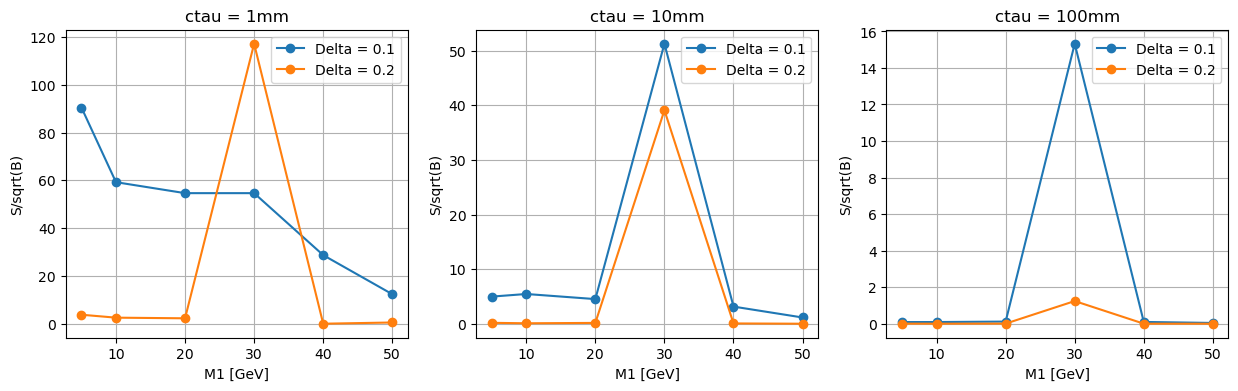

In [66]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, ctau in enumerate(ctaus):
    ctau = int(ctau)
    
    y_arr_1 = delta_0p1_SoverB_df.iloc[idx].to_list()
    y_arr_2 = delta_0p2_SoverB_df.iloc[idx].to_list()

    x_arr = sorted(m1s)
    
    axes[idx].plot(x_arr, y_arr_1, '-o', label=f'Delta = 0.1')
    axes[idx].plot(x_arr, y_arr_2, '-o', label=f'Delta = 0.2')

    axes[idx].legend()
    
    axes[idx].set_xlabel('M1 [GeV]')
    axes[idx].set_ylabel('S/sqrt(B)')
    
    axes[idx].grid()
    
    axes[idx].set_title(f'ctau = {ctau}mm')

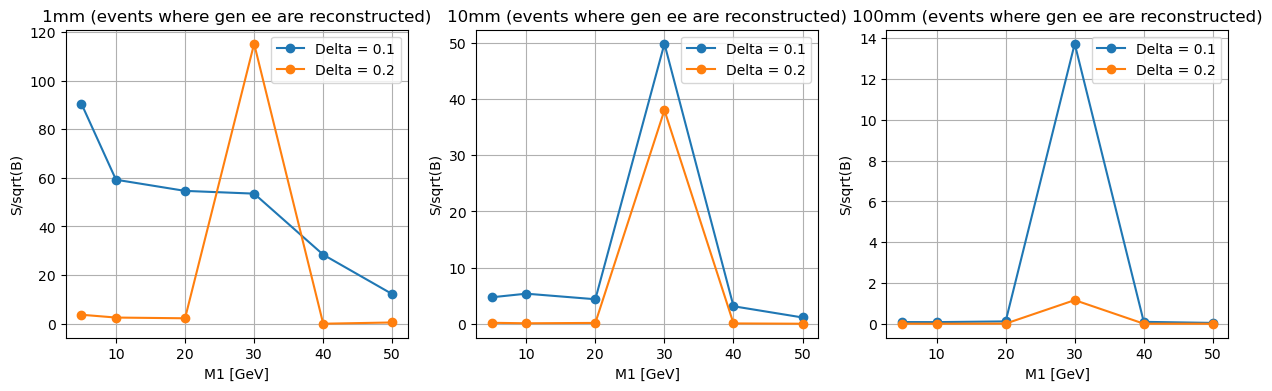

In [67]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, ctau in enumerate(ctaus):
    ctau = int(ctau)
    
    y_arr_1 = delta_0p1_SoverB_reco_df.iloc[idx].to_list()
    y_arr_2 = delta_0p2_SoverB_reco_df.iloc[idx].to_list()

    x_arr = sorted(m1s)
    
    axes[idx].plot(x_arr, y_arr_1, '-o', label=f'Delta = 0.1')
    axes[idx].plot(x_arr, y_arr_2, '-o', label=f'Delta = 0.2')

    axes[idx].legend()
    
    axes[idx].set_xlabel('M1 [GeV]')
    axes[idx].set_ylabel('S/sqrt(B)')
    
    axes[idx].grid()
    
    axes[idx].set_title(f'{ctau}mm (events where gen ee are reconstructed)')

## Vertex purity

In [68]:
delta = '0p1'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_match_df[delta][ctau].columns]
    signal_match_df[delta][ctau].columns = m1s

    signal_match_df[delta][ctau] = signal_match_df[delta][ctau].sort_index(axis=1)

frames = [signal_match_df[delta]['1'], signal_match_df[delta]['10'], signal_match_df[delta]['100']]
delta_0p1_match_df = pd.concat(frames)

In [69]:
print('Cut-based SR')
print('delta = 0.1, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(all)]')

delta_0p1_match_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p1_match_df

Cut-based SR
delta = 0.1, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(all)]


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,0.978,0.980,0.964,0.931,0.963,0.953
10mm,0.947,0.917,0.931,0.971,0.976,0.961
100mm,0.800,0.833,0.953,0.870,0.945,0.899


In [70]:
for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_match_reco_df[delta][ctau].columns]
    signal_match_reco_df[delta][ctau].columns = m1s

    signal_match_reco_df[delta][ctau] = signal_match_reco_df[delta][ctau].sort_index(axis=1)

frames = [signal_match_reco_df[delta]['1'], signal_match_reco_df[delta]['10'], signal_match_reco_df[delta]['100']]
delta_0p1_match_reco_df = pd.concat(frames)

In [71]:
print('Cut-based SR')
print('delta = 0.1, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(having gen ee reconstructed)]')
delta_0p1_match_reco_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p1_match_reco_df

Cut-based SR
delta = 0.1, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(having gen ee reconstructed)]


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,0.978,0.980,0.964,0.951,0.973,0.967
10mm,1.000,0.935,0.964,1.000,0.986,0.987
100mm,0.889,0.972,0.976,0.971,1.000,0.954


In [72]:
delta = '0p2'

for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_match_df[delta][ctau].columns]
    signal_match_df[delta][ctau].columns = m1s

    signal_match_df[delta][ctau] = signal_match_df[delta][ctau].sort_index(axis=1)

frames = [signal_match_df[delta]['1'], signal_match_df[delta]['10'], signal_match_df[delta]['100']]
delta_0p2_match_df = pd.concat(frames)

In [73]:
print('Cut-based SR')
print('delta = 0.2, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(all)]')

delta_0p2_match_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p2_match_df

Cut-based SR
delta = 0.2, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(all)]


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,0.962,0.972,0.958,0.972,0.000,0.941
10mm,0.965,0.943,0.937,0.943,0.967,0.989
100mm,0.750,0.777,0.841,0.867,0.903,0.860


In [74]:
for idx, ctau in enumerate(ctaus):
    m1s = [int(ptools.signalPoint(i)['m1']) for i in signal_match_reco_df[delta][ctau].columns]
    signal_match_reco_df[delta][ctau].columns = m1s

    signal_match_reco_df[delta][ctau] = signal_match_reco_df[delta][ctau].sort_index(axis=1)

frames = [signal_match_reco_df[delta]['1'], signal_match_reco_df[delta]['10'], signal_match_reco_df[delta]['100']]
delta_0p2_match_reco_df = pd.concat(frames)

In [75]:
print('Cut-based SR')
print('delta = 0.2, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(having gen ee reconstructed)]')
delta_0p2_match_reco_df.columns = [f'{m1} GeV' for m1 in sorted(m1s)]

delta_0p2_match_reco_df

Cut-based SR
delta = 0.2, vertex purity = [nEvents(best vertex matches the true vertex)] / [nEvents(having gen ee reconstructed)]


,5 GeV,10 GeV,20 GeV,30 GeV,40 GeV,50 GeV
1mm,0.980,0.972,0.972,0.988,0.000,0.941
10mm,0.965,0.971,0.974,0.970,0.967,1.000
100mm,1.000,1.000,0.964,0.929,1.000,0.942


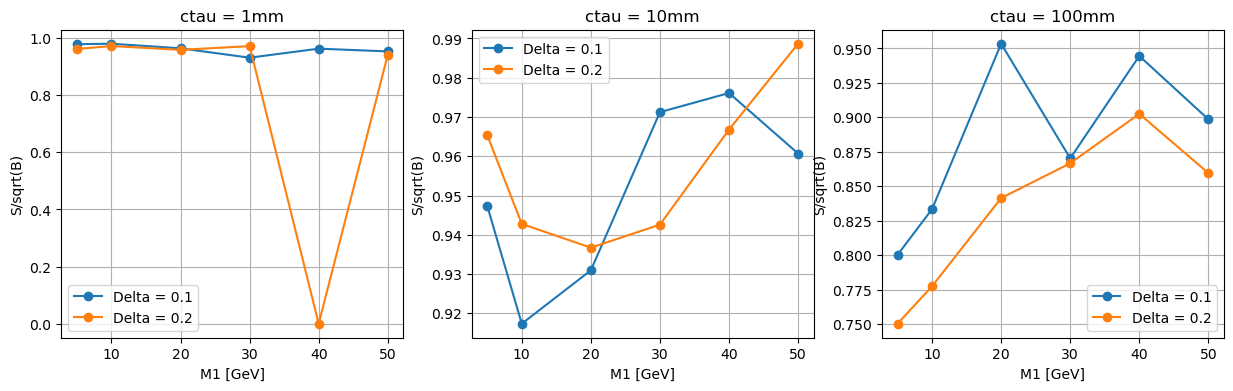

In [76]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, ctau in enumerate(ctaus):
    ctau = int(ctau)
    
    y_arr_1 = delta_0p1_match_df.iloc[idx].to_list()
    y_arr_2 = delta_0p2_match_df.iloc[idx].to_list()

    x_arr = sorted(m1s)
    
    axes[idx].plot(x_arr, y_arr_1, '-o', label=f'Delta = 0.1')
    axes[idx].plot(x_arr, y_arr_2, '-o', label=f'Delta = 0.2')

    axes[idx].legend()
    
    axes[idx].set_xlabel('M1 [GeV]')
    axes[idx].set_ylabel('S/sqrt(B)')
    
    axes[idx].grid()
    
    axes[idx].set_title(f'ctau = {ctau}mm')

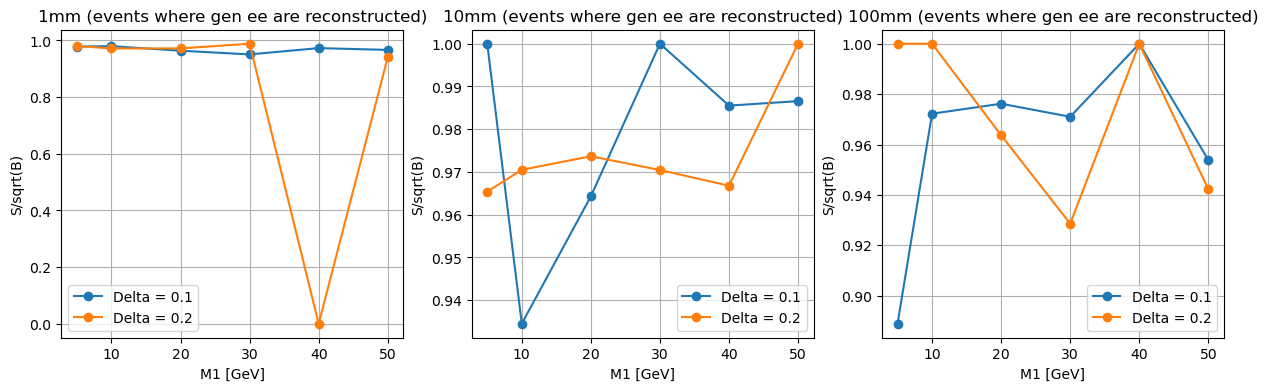

In [77]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, ctau in enumerate(ctaus):
    ctau = int(ctau)
    
    y_arr_1 = delta_0p1_match_reco_df.iloc[idx].to_list()
    y_arr_2 = delta_0p2_match_reco_df.iloc[idx].to_list()

    x_arr = sorted(m1s)
    
    axes[idx].plot(x_arr, y_arr_1, '-o', label=f'Delta = 0.1')
    axes[idx].plot(x_arr, y_arr_2, '-o', label=f'Delta = 0.2')

    axes[idx].legend()
    
    axes[idx].set_xlabel('M1 [GeV]')
    axes[idx].set_ylabel('S/sqrt(B)')
    
    axes[idx].grid()
    
    axes[idx].set_title(f'{ctau}mm (events where gen ee are reconstructed)')

In [78]:
# export
delta_0p1_SoverB_df.to_csv('../SR_BDT-based/Cut-based-SR_SoverB_delta_0p1.csv')
delta_0p2_SoverB_df.to_csv('../SR_BDT-based/Cut-based-SR_SoverB_delta_0p2.csv') 

# export
delta_0p1_SoverB_reco_df.to_csv('../SR_BDT-based/Cut-based-SR_SoverB_delta_0p1_hasGenEEreconstructed.csv')
delta_0p2_SoverB_reco_df.to_csv('../SR_BDT-based/Cut-based-SR_SoverB_delta_0p2_hasGenEEreconstructed.csv') 

In [79]:
# export
delta_0p1_match_df.to_csv('../SR_BDT-based/Cut-based-SR_Purity_delta_0p1.csv') 
delta_0p2_match_df.to_csv('../SR_BDT-based/Cut-based-SR_Purity_delta_0p2.csv') 

delta_0p1_match_reco_df.to_csv('../SR_BDT-based/Cut-based-SR_Purity_delta_0p1_hasGenEEreconstructed.csv') 
delta_0p2_match_reco_df.to_csv('../SR_BDT-based/Cut-based-SR_Purity_delta_0p2_hasGenEEreconstructed.csv') 